In [108]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.edgecolor': '.1', 'grid.color': '.1', 'grid.linestyle': '--'})

In [109]:
def plot(obj):
    setting = 'n100'
    df = pd.read_pickle(f'result/{obj}-{setting}.pkl')

    alphas = [0.1, 1, 10]
    _, axes = plt.subplots(1, len(alphas), sharey=True, figsize=(len(alphas)*5+1, 3))

    # iterate over the unique alpha and beta pairs, and create a subplot for each pair
    for i, alpha in enumerate(alphas):
        ax = axes[i]

        # select the subset of the data for this alpha and beta pair
        subset = df[df['alpha'] == alpha]

        # calculate the mean and standard deviation over the trials
        mean_itr_p = subset.groupby('t')['itr_p'].mean().reset_index()
        mean_itr_q = subset.groupby('t')['itr_q'].mean().reset_index()
        mean_itr_c = subset.groupby('t')['itr_c'].mean().reset_index()
        std_itr_p = subset.groupby('t')['itr_p'].std().reset_index()
        std_itr_q = subset.groupby('t')['itr_q'].std().reset_index()
        std_itr_c = subset.groupby('t')['itr_c'].std().reset_index()

        print(f"alpha = {alpha}, method = Learn, #iterations = {mean_itr_p.iloc[99]['itr_p']} +/- {std_itr_p.iloc[99]['itr_p']:0.1f}")
        print(f"alpha = {alpha}, method = Relax, #iterations = {mean_itr_q.iloc[99]['itr_q']} +/- {std_itr_q.iloc[99]['itr_q']:0.1f}")
        print(f"alpha = {alpha}, method = Cold,  #iterations = {mean_itr_c.iloc[99]['itr_c']} +/- {std_itr_c.iloc[99]['itr_c']:0.1f}")

        # define the colors
        itr_p_color = '#DD8452'
        itr_q_color = '#5B9B5B'
        itr_c_color = '#4C72B0'

        # plot with error bands
        sns.lineplot(data=mean_itr_p, x='t', y='itr_p', ax=ax, label=r'\rm Learn', err_style='band', err_kws={'alpha': 0.2}, color=itr_p_color, linestyle='-')
        ax.fill_between(mean_itr_p['t'], mean_itr_p['itr_p'] - std_itr_p['itr_p'], mean_itr_p['itr_p'] + std_itr_p['itr_p'], alpha=0.1, color=itr_p_color)

        sns.lineplot(data=mean_itr_q, x='t', y='itr_q', ax=ax, label=r'\rm Relax', err_style='band', err_kws={'alpha': 0.2}, color=itr_q_color, linestyle='-.')
        ax.fill_between(mean_itr_q['t'], mean_itr_q['itr_q'] - std_itr_q['itr_q'], mean_itr_q['itr_q'] + std_itr_q['itr_q'], alpha=0.1, color=itr_q_color)

        sns.lineplot(data=mean_itr_c, x='t', y='itr_c', ax=ax, label=r'\rm Cold', err_style='band', err_kws={'alpha': 0.2}, color=itr_c_color, linestyle='--')
        ax.fill_between(mean_itr_c['t'], mean_itr_c['itr_c'] - std_itr_c['itr_c'], mean_itr_c['itr_c'] + std_itr_c['itr_c'], alpha=0.1, color=itr_c_color)

        # set the title and axis labels
        ax.set_title(rf'$\sigma = {alpha}$')
        ax.set_xlabel(r'$t$')
        ax.set_ylabel(r'\rm Iterations')

        # set the legend, 'upper right'
        ax.legend(loc='upper right')

        # set the y-tick frequency
        # ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))

    # adjust the spacing between the subplots
    plt.subplots_adjust(wspace=.15, hspace=.32)

    # show or save the plot
    #plt.show()
    plt.savefig(f'figure/{obj}-{setting}.pdf', bbox_inches='tight')

alpha = 0.1, method = Learn, #iterations = 27.9 +/- 2.6
alpha = 0.1, method = Relax, #iterations = 7.1 +/- 1.1
alpha = 0.1, method = Cold,  #iterations = 193.1 +/- 1.1
alpha = 1, method = Learn, #iterations = 52.0 +/- 16.7
alpha = 1, method = Relax, #iterations = 12.2 +/- 2.7
alpha = 1, method = Cold,  #iterations = 193.8 +/- 14.0
alpha = 10, method = Learn, #iterations = 162.0 +/- 28.5
alpha = 10, method = Relax, #iterations = 13.5 +/- 2.8
alpha = 10, method = Cold,  #iterations = 246.9 +/- 37.8


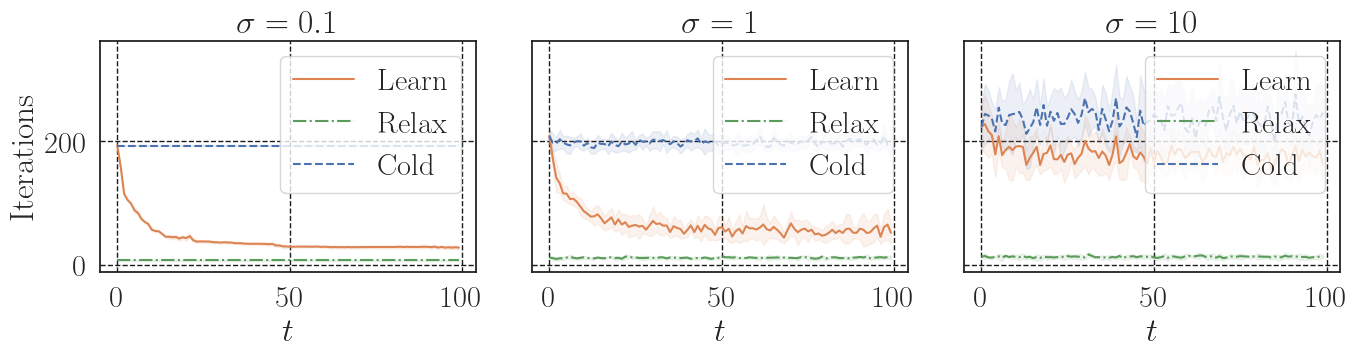

In [110]:
plot('f')

alpha = 0.1, method = Learn, #iterations = 32.9 +/- 3.0
alpha = 0.1, method = Relax, #iterations = 161.8 +/- 1.0
alpha = 0.1, method = Cold,  #iterations = 332.5 +/- 1.9
alpha = 1, method = Learn, #iterations = 64.7 +/- 14.8
alpha = 1, method = Relax, #iterations = 170.1 +/- 8.8
alpha = 1, method = Cold,  #iterations = 337.5 +/- 11.0
alpha = 10, method = Learn, #iterations = 266.5 +/- 34.1
alpha = 10, method = Relax, #iterations = 199.6 +/- 42.1
alpha = 10, method = Cold,  #iterations = 390.9 +/- 63.4


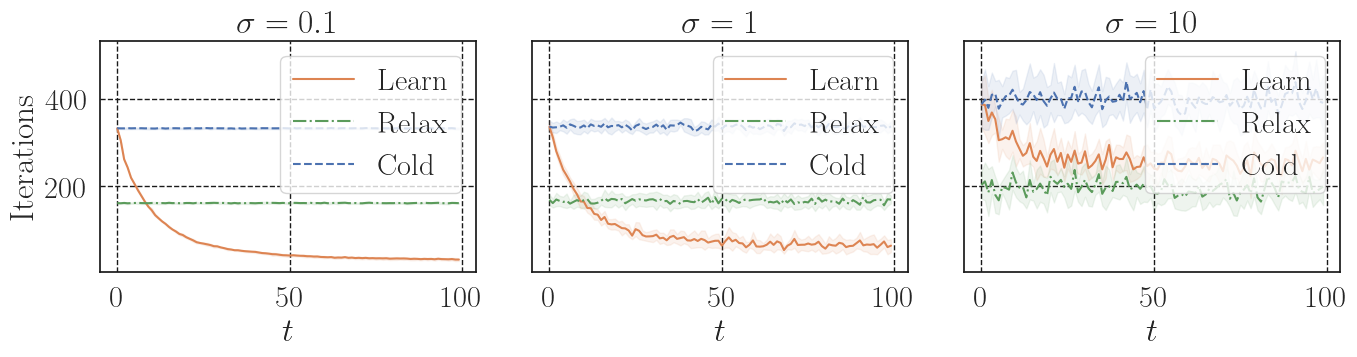

In [111]:
plot('crash')

alpha = 0.1, method = Learn, #iterations = 4.1 +/- 1.0
alpha = 0.1, method = Relax, #iterations = 14.0 +/- 0.7
alpha = 0.1, method = Cold,  #iterations = 21.0 +/- 0.0
alpha = 1, method = Learn, #iterations = 10.7 +/- 3.9
alpha = 1, method = Relax, #iterations = 12.8 +/- 3.4
alpha = 1, method = Cold,  #iterations = 21.9 +/- 3.3
alpha = 10, method = Learn, #iterations = 40.4 +/- 16.9
alpha = 10, method = Relax, #iterations = 13.0 +/- 5.8
alpha = 10, method = Cold,  #iterations = 30.0 +/- 13.8


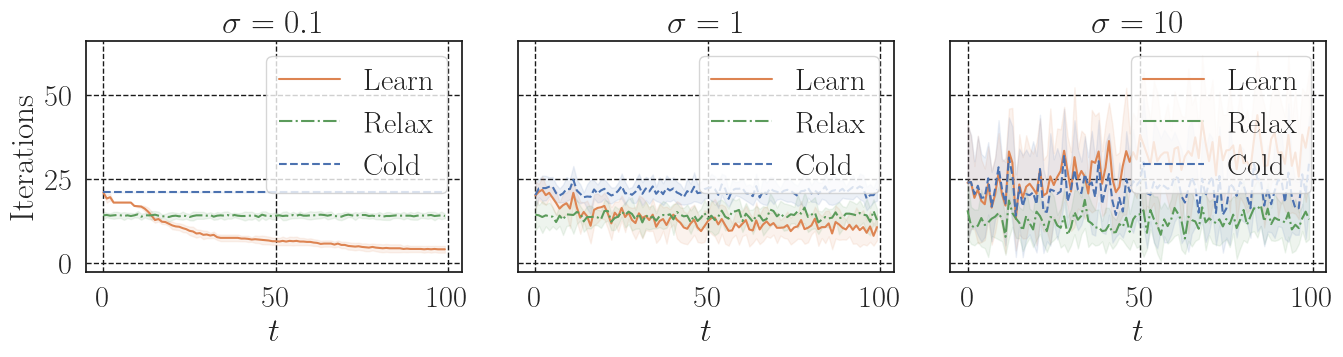

In [112]:
plot('fuel')